In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline
from scipy.stats import multivariate_normal as N

In [68]:
data = pd.read_csv('./data/old_faithful.csv', index_col=0)

In [71]:
data = data / data.max(axis=0)

In [602]:
centers = np.c_[[0.4, 0.5], [0.9,0.5]]

In [86]:
sigmas = [np.eye(2)*0.5 for i in (0,1)]

In [90]:
Pis = 

In [129]:
components = [N(c, sigm).pdf for (c,sigm) in zip(centers, sigmas)]

In [95]:
data = data.valuesgmm.step(data)gmm.step(data)

In [ ]:
pi[k] * components[k].pdf(x) for j in range(2)

In [132]:
components[0](data).shape

(272,)

In [673]:
a = np.c_[[1,2],[2,3],[4,5]].T
b = np.c_[[1,2],[2,4],[4,5]].T

In [705]:
class GMM(object):
    def __init__(self, n_components):
        self.m = n_components
        self.dim = None
        self.Pi = [0.5] * n_components
        self.comps = []
        self.centers = None
        self.sigmas = None
    
    def fit(self, data, max_iter=1, stop_thresh=1e-4):
        dim = data.shape[1]
        
        self.sigmas = [np.eye(dim)] * self.m
        self.centers = np.c_[[0,0] * self.m]

        for i in range(max_iter):
            if self.step(data) < stop_thresh:
                print(f"finished early on step {i}")
                break
    
    def _new_comp(self, mu, sigma):
        self.mu_prev = self.centers.copy()
        self.comps = [
            N(c, sigm).pdf for (c, sigm) in zip(mu, sigma)
        ]
        delta = max([np.linalg.norm(c-cp) for c,cp in zip(mu, self.centers)])
        self.centers = mu
        self.sigmas = sigma
        return delta
    
    def step(self, data):
        gamma = self._E(data)
        mu, sigma = self._M(data, gamma)
        return self._new_comp(mu, sigma)
        
    def _E(self, data):
        resp = np.c_[[Pi * c(data) for Pi,c in zip(self.Pi, self.comps)]].T
        norms = resp.sum(axis=1)
        return resp / norms[:,np.newaxis]
    
    def _M(self, data, gammas):
        Nk = gammas.sum(axis=0)
        mu_n = [1/Nk[i] * (data * gammas[:,i:i+1]).sum(axis=0) for i in range(self.m)]
        t = lambda i: gammas[:,i:i+1]*(data - mu_n[i])
        sigm_n = [t(i).T @ t(i) / Nk[i] for i in range(self.m)]
        self.Pi = Nk / len(data)
        return mu_n, sigm_n

In [706]:
def plot_gauss(mu, sigma, c='r'):
    lam, v = np.linalg.eig(sigma)
    lam = np.sqrt(lam)
    ell = Ellipse(xy=mu, width=lam[0]*2, height=lam[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0]))
                 )
    ell.set_facecolor(c)
    ell.set_edgecolor(c)
    ell.set_alpha(0.3)
    return ell

In [707]:
gmm = GMM(2)

In [708]:
gmm.fit(data)

IndexError: index 0 is out of bounds for axis 0 with size 0

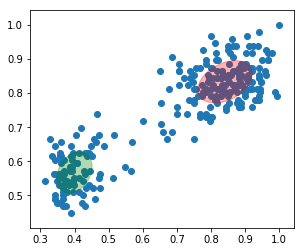

In [696]:
ax = plt.subplot(111, aspect='equal')
for mu,sigm,c in zip(gmm.centers, gmm.sigmas, ['r','g']):
    ell = plot_gauss(mu, sigm, c)
    ax.add_artist(ell)
plt.scatter(data[:,0], data[:,1])

In [697]:
gmm.step(data)